В этом ноутбуке напишем несколько примитивных моделей машинного обучения, чтобы понять структуру модели.

Положим целевую функцию *f(x) = c*, то есть константа. То есть для любого набора данных будем предсказывать одно и тоже значение (независимость от X). Зафиксируем метрику *MAE (mean absolute error)* 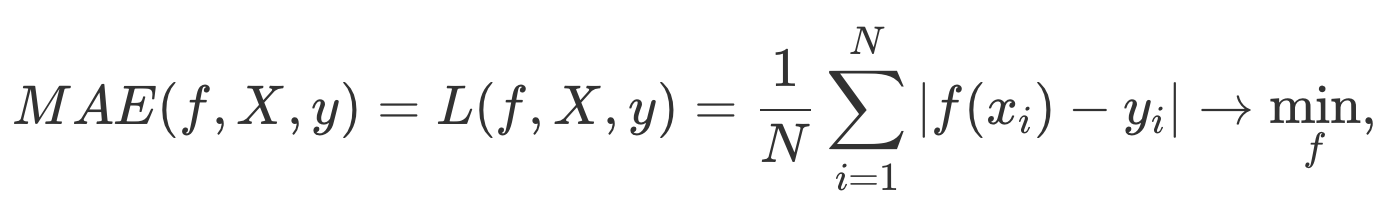

Подставим *f(x)=c*

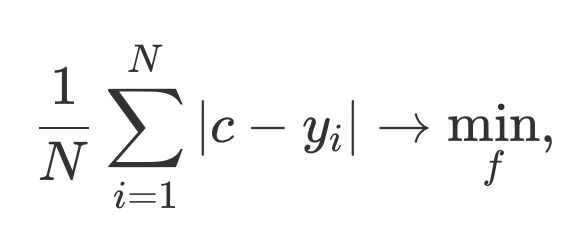

Найдем производную и приравняем к нулю, чтобы найти минимум метрики
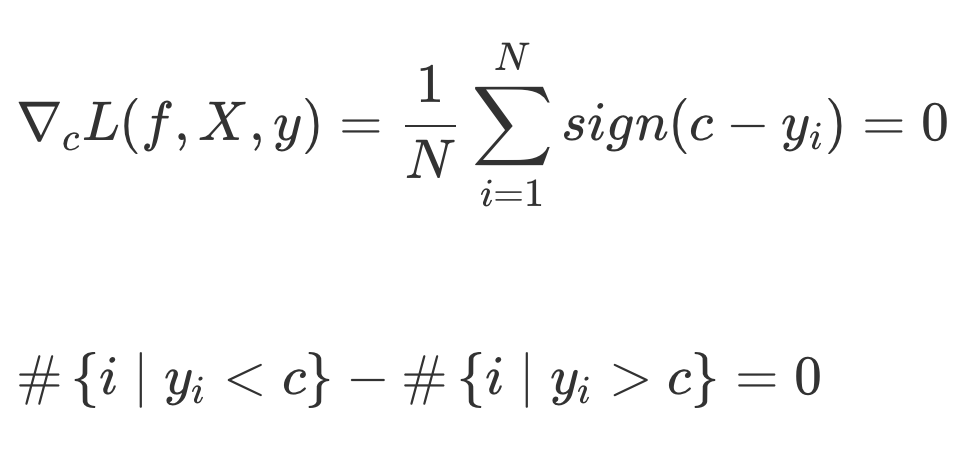

из нижней формулы видно, что подходит такое *c*, что половина значений *y* меньше *c*, а другая половина больше *c*. Можно сделать вывод, что *c* - медиана.

Напишем такую "регрессионную" модель для *f(x) = c*

In [ ]:
import numpy as np
from sklearn.base import RegressorMixin

class MedianRegressor(RegressorMixin):
    # Predicts the median of y_train
    def __init__(self):
        self.model = 0
        self.y_shape = 0

    def fit(self, X=None, y=None):
        self.y_shape = y.shape[0]
        self.model = np.full(shape=self.y_shape, fill_value=np.median(y))

    def predict(self, X=None):
        predicted = self.model
        return np.full(shape=self.y_shape, fill_value=predicted)

Немного из того, о чем код:
RegressorMixin - это миксин, который определяет, что наша функция - регрессор и добавляет метод score, вычисляющий метрику R^2 (коэффициент детерминации). Метод fit обучает модель (вычисляет нашу *f(x)=c*), predict с помощью обученной модели предсказывает целевой вектор.

Теперь возьмем метрику *MSE* - выглядит она так: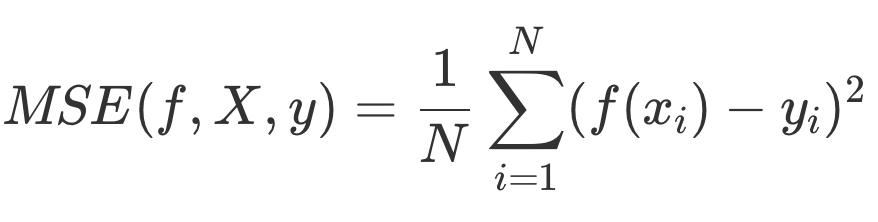

Подставим *f(x)=c*, найдем производную по *c* и приравняем к нулю, чтобы найти минимум метрики. Получим *2∑(c-y_i)/N = 0*, отсюда *∑(c-y_i) = 0*, а значит *c* - среднее значение. Регрессор будет выглядеть точно так же, только надо поменять медиану на среднее значение.